In [1]:
# Importing libraries 
import numpy as np
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Loading the data
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

# Preprocessing the data
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

# Reshaping the training and testing set
X_train = X_train.reshape(len(X_train),np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test),np.prod(X_test.shape[1:]))


In [2]:
# Building the autoencoder model
encoding_dim = 32
input_img = Input(shape=(784,)) # A place holder 
encoded = Dense(encoding_dim,activation='relu')(input_img) # encoded representation
decoded = Dense(784,activation='sigmoid')(encoded) # Decoded representation 
Autoencoder = Model(input_img,decoded) # The complete Autoencoder model


In [3]:
# Now creating a separate encoding and decoding model similar to how I created an autoencoder
encoded_input = Input(shape=(784,)) # A place holder 
encoder = Model(input_img,encoded) # An encoder model

decoded_input = Input(shape=(encoding_dim,))
decoder_layer = Autoencoder.layers[-1]
decoder = Model(decoded_input,decoder_layer(decoded_input))

In [4]:
# Compiling the autoencoder
Autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
# Just making a note that 'adam' optimizer works here better than the 'adadelta' optimizer
# Fitting the model
Autoencoder.fit(X_train,X_train,epochs=10,batch_size=256,shuffle=True,validation_data=(X_test,X_test))

W0702 18:57:11.452452 4452134336 deprecation.py:323] From /Users/abhishekde/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2763 - val_loss: 0.1880
Epoch 2/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1691 - val_loss: 0.1527
Epoch 3/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1443 - val_loss: 0.1342
Epoch 4/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1290 - val_loss: 0.1217
Epoch 5/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1186 - val_loss: 0.1132
Epoch 6/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1116 - val_loss: 0.1075
Epoch 7/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1065 - val_loss: 0.1030
Epoch 8/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1026 - val_loss: 0.0997
Epoch 9/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0998 - val_

In [5]:
# For the analysis of the encoded and decoded data 
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)
#decoded_imgs = Autoencoder.predict(X_test)

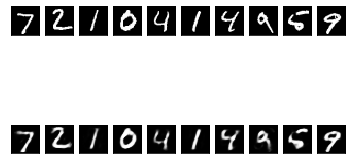

In [6]:
# For displaying the results
n = 10

for ii in range(n):
    # Display the number 
    ax = plt.subplot(2,n,ii+1)
    plt.imshow(X_test[ii].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display the the results from the autoencoder
    ax = plt.subplot(2,n,ii+1+n)
    plt.imshow(decoded_imgs[ii].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
    

In [ ]:
# Autoencoder is working till this point 
# Want to check if I can see the output from the 32 encoded dimensions using t-SNE technique 
from sklearn.manifold import TSNE
X_encoded = TSNE(n_components=2).fit_transform(encoded_imgs)

# Performing the TNSE on the original data 
X_test_lowdim = TSNE(n_components=2).fit_transform(X_test)


/Users/abhishekde/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/abhishekde/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/Users/abhishekde/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding a

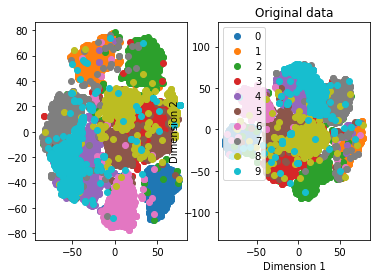

In [126]:
# Plotting the TNSE results 
# Just making a note that TSNE takes a good time to find the space 


values = np.unique(Y_test)
ax = plt.figure
for ii in values:
    # Encoded data from the autoencoder
    plt.subplot(121)
    ind = Y_test == ii
    plt.plot(X_encoded[ind,0],X_encoded[ind,1],'o',label=ii)
    
    # Compresses original data 
    plt.subplot(122)
    plt.plot(X_test_lowdim[ind,0],X_test_lowdim[ind,1],'o',label=ii)

plt.subplot(121)     
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Encoded data')
plt.axis('equal')
plt.legend()

plt.subplot(122)    
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Original data')
plt.axis('equal')
plt.legend()

plt.show()

In [ ]:
# Trying if UMAP works
import umap